# Report
- COSC-254
- Data Mining
- Prof. Riondatto

Group 1: Nico Langlois, Daniel Njoo, Willie Turchetta, Hyery Yoo

Topic: Sampling on Graphs

## Table of Contents
1. Introduction
2. Results
    1. Raw results
    2. Aggregated results
3. Discussion
    1. Behavior by sample size (plots)
    2. Hop Plots
    3. Erraneous notes
4. Plots


## Introduction

For our project we looked at the following paper [Sampling from Large Graphs (Leskovec & Faloutsos, 2006)](https://cs.stanford.edu/people/jure/pubs/sampling-kdd06.pdf) and implemented the 4 following sampling algorithms mentioned for sample sizes `{5%, 10%, 15%, 20%}`:
1. Random Node (RN)- uniformly at random select odes
2. Random Node Edge (RNE)- uniformly at random select edges
3. Random Walk (RW)- uniformly at random pick a starting node then simulate a random walk along the graph
4. Forest Fire (FF)- randomly pick a seed node, burn outgoing links, where if a link gets burned, the receiving node has a chance of burning its own links recursively; forward/backward burn probabilities are defined

Note these 4 algorithms fall into one of three categories:
1. Sampling by random node selection: RN
2. Sampling by random edge selection: RNE, and
3. Sampling by exploration: RW + FF

And evaluated the samples on the following 7 statistics where we calculated a 2-sample D-statistic by comparing the sample vs. the original graph:
1. In-degree distribution,
2. Out-degree distribution,
3. Distribution of sizes of weakly connected components (WCC),
4. Distribution of sizes of strongly connected components (SCC),
5. Hop-plot,
6. Hop-plot on WCC, and
7. Clustering coefficient

We did not calculate D-statistics for the Hop-plot or Hop-plot on WCC, however, and instead looked at the percentage against the entire dataset.

We used the Stanford web graph found here ([web link](http://snap.stanford.edu/data/index.html), [direct download](http://snap.stanford.edu/data/web-Stanford.html)) for our project, which is a directed graph of the Stanford.edu website with about 230,000 nodes and a few million edges. While admittedly the Standford web graph is not a huge graph it is certainly sufficient for this project.

## Results
### Raw results

Results below are shown as the D-statistic for a given sampling algorithm at a specific sample size, averaged over 5 runs.  

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
stats = pd.read_csv("Final_Stats.csv", sep = ",")
stats = stats.drop(stats.columns[0], axis=1)
stats.index = ['In degree', 'Out degree', 'WCC', 'SCC', 'Hop plot', 'Hop plot WCC', 'Clustering coefficient']
stats.drop(["Hop plot", "Hop plot WCC"], axis = 0, inplace = True)


for c in stats.columns:
    df = pd.concat([stats[c].str.strip('[]').str.split(', ', expand=True)], axis=1, keys=stats.columns).astype(float)
    stats[c] = df.mean(axis=1)
    
stats.loc['Average_D'] = stats.mean()

In [17]:
stats

,RW5%,RNE5%,FF5%,RN5%,RW10%,RNE10%,FF10%,RN10%,RW15%,RNE15%,FF15%,RN15%,RW20%,RNE20%,FF20%,RN20%
In degree,0.424077,0.648199,0.260670,0.508704,0.400715,0.629156,0.182130,0.432971,0.383925,0.617309,0.177691,0.387463,0.369048,0.603855,0.187064,0.352763
Out degree,0.544072,0.887574,0.267488,0.653541,0.529540,0.875996,0.298850,0.578661,0.519775,0.863327,0.304924,0.476377,0.508440,0.849936,0.312031,0.444548
WCC,0.408965,0.488094,0.992000,0.493153,0.333984,0.427612,0.892000,0.399329,0.315627,0.353965,0.367832,0.383956,0.302083,0.297785,0.309119,0.355179
SCC,0.493323,0.991111,0.594725,0.929778,0.420531,0.989333,0.510739,0.863937,0.391216,0.988444,0.362275,0.745627,0.341552,0.985778,0.309513,0.632281
Clustering coefficient,0.009015,0.006553,0.006966,0.011749,0.005855,0.006006,0.005119,0.008967,0.004318,0.003939,0.003840,0.007280,0.002884,0.003020,0.004118,0.003643
Average_D,0.375891,0.604306,0.424370,0.519385,0.338125,0.585621,0.377768,0.456773,0.322972,0.565397,0.243313,0.400141,0.304801,0.548075,0.224369,0.357683


### Aggregated results

As the authors in [(Leskovec & Faloutsos, 2006)](https://cs.stanford.edu/people/jure/pubs/sampling-kdd06.pdf) did, we then present results as averaged for a given sampling algorithm over all sample sizes tested.

In [19]:
ll = [[]] *5
for i in range(5):
    ll[i]= [stats[["RN5%", "RN10%", "RN15%", "RN20%"]].iloc[i].mean(),
            stats[["RNE5%", "RNE10%", "RNE15%", "RNE20%"]].iloc[i].mean(),
            stats[["RW5%", "RW10%", "RW15%", "RW20%"]].iloc[i].mean(),
            stats[["FF5%", "FF10%", "FF15%", "FF20%"]].iloc[i].mean()]

In [20]:
stats2 = pd.DataFrame(ll, columns=["RN", "RNE", "RW", "FF"])
stats2.index = ['In degree', 'Out degree', 'WCC', 'SCC', 'Clustering coefficient']
stats2.T

,In degree,Out degree,WCC,SCC,Clustering coefficient
RN,0.420475,0.538282,0.407905,0.792906,0.007910
RNE,0.624630,0.869208,0.391864,0.988667,0.004880
RW,0.394441,0.525457,0.340165,0.411655,0.005518
FF,0.201889,0.295824,0.640238,0.444313,0.005011


## Discussion


Kolmogorov's D-statistic measures the agreement between two samples based on the difference between the empirical cumulative distirbution function (ECDF) of the sample against the CDF of the reference distribution. A smaller D-statistic means there is greater agreement (as a larger statistic gives more evidence to reject the implicit null distirbution that the sample comes from the same distribution).

Looking at our results above, we found the best algorithms were:
- In-degree: Forest Fire 
- Out-degree: Forest Fire
- WCC: RW
- SCC: RW
- Clustering coefficient: RNE

With the exception of clustering coefficient, exploration algorithms (RW + FF) generally work best. 

Comparing our results versus the authors' results:
- In-degree: Forest Fire 
    - same
- Out-degree: Forest Fire
    - same
- WCC: RW
    - authors find RNE to be better, but our results are close
- SCC: RW
    - same (very close)
- Clustering coefficient: RNE
    - authors find RW/FF to be better, but our results are close
    
### Behavior by sample size (plots)

The plots below show changes in D-statistics with respect to sample size. Some notable observations from the plots: 

- In-degree and out-degree
    - Increasing the sample size has a small influence on performance for all algorithms
    - FF consistently performs best at all sample sizes
- WCC
    - Mostly small differences between algorithms
    - FF performs poorly at sample sizes 10% and below
- SCC
    - RW and FF perform best over all sample sizes
    - RNE does not improve in performace even as sample size increases 
- Clustering coefficient
    - Generally small D-statistics
    - RNE consistently performs best 
    
An interesting note is that the D-statistic across our samples generally decreases as the sample size increases, which makes sense because as our sample increases we are getting a better representation of the entire graph.
  
### Hop Plots
  
The statistics used for Hop Plots and Hop Plots on WCC is the number of pairs reached in 3 hops as a percentage. In this case, a larger statistic indicates better performance. Something interesting to note about the Hop Plot in both cases is that first, it is strictly increasing as a larger sample size = more nodes and edges = more pairs which will be connected (in a certain number of steps). Also there should be exponential growth in a hop plot, which can best be explained with an example: a second node added can only increase the number of pairs by 1 but a fourth node added can increase the number of pairs by 4, which we do see in our plots.

- Best algorithms : RW and FF
    - Improve as sample size increases
    - WCC hop plot
        - RW improves much more rapidly than FF
- RN and RNE
    - Statistic is (almost) 0 regardless of sample size
    
It makes sense that RN and RNE performed so poorly on the hop plot because in nature their sampling methods are way more sparse than RW and FF are which will without a doubt find more pairs, so our graphs are quite logical.

The reason that we did not calculate a D-statistic for Hop Plot and Hop Plot WCC is because to create one you would need to conduct runs using different data sets, different number of hops, and different sample sizes, which we did not manage to accomplish in this project. However, we believe the core concept and interpretation can be extrapolated from the Hop Plot itself.

### Erraneous notes

The paper that we read implemented all of these plots across 20 different sample sizes, ten runs per dataset, four + algorithms, and about ten statistics (about 8000 runs - very time consuming). We ran this project across 4 different sample sizes, 4 algorithms, 5 runs per sample size/algorithm, and 7 statistics (about 560 runs), which was hefty in and of itself. If we were to continue with this project we would want to match that but given how similar are resuts were we felt it was inefficient to run it on more datasets and a better use of our time to analyze the results we got on the Stanford web dataset.

![Figure1](Figures/Figure1.png)

## Plots 
### Sample size vs. D-statistic graphs

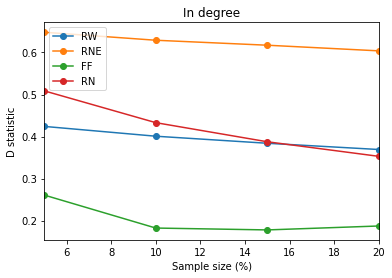

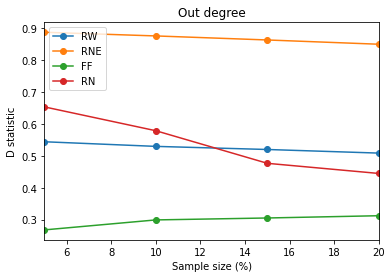

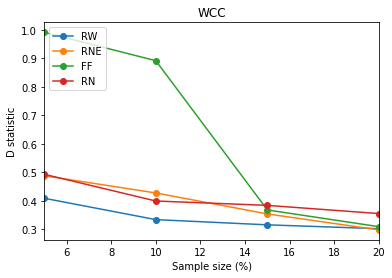

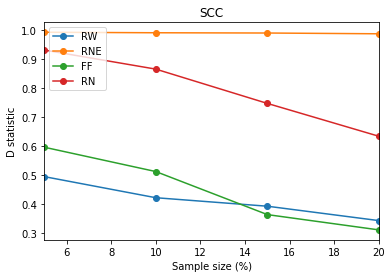

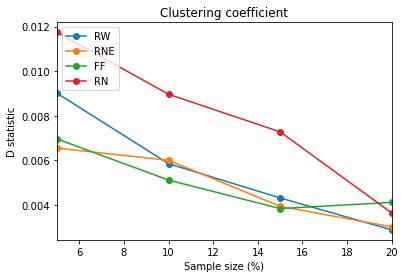

In [21]:
evals = ['In degree', 'Out degree', 'WCC', 'SCC', 'Clustering coefficient']

for r in range(0,5):
    
    df = pd.DataFrame(index = ['RW', 'RNE', 'FF', 'RN'])

    for x in range(0,4):
        temp = stats.iloc[r, x*4:x*4+4]
        temp.index = df.index
        df = pd.concat([temp, df], axis=1, ignore_index=True)

    df.loc['Sample size'] = [20, 15, 10, 5]
    df = df.transpose()

    df.plot(x='Sample size', y=['RW', 'RNE', 'FF', 'RN'], marker="o")
    plt.title(evals[r])
    plt.xlabel('Sample size (%)')
    plt.ylabel('D statistic')
    plt.legend(loc='upper left')

### Hop Plot and Hop Plot WCC

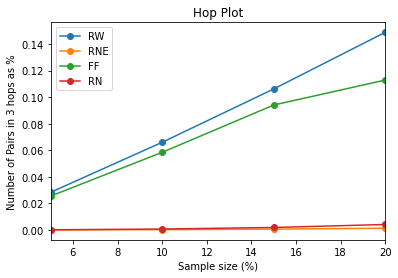

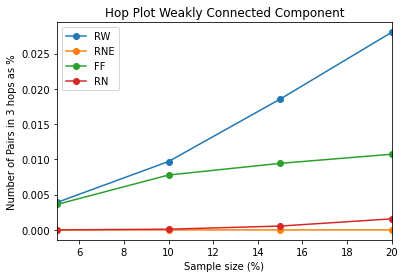

In [14]:
data = pd.read_csv("Final_Stats.csv", sep = ",")
data = data.drop(data.columns[0], axis=1)
data.index = ['In degree', 'Out degree', 'WCC', 'SCC', 'Hop plot', 'Hop plot WCC', 'Clustering coefficient']
data.drop(['In degree', 'Out degree', 'WCC', 'SCC', 'Clustering coefficient'], axis = 0, inplace = True)


for c in data.columns:
    df = pd.concat([data[c].str.strip('[]').str.split(', ', expand=True)], axis=1, keys=data.columns).astype(float)
    data[c] = df.mean(axis=1)

data[0:1] = data[0:1]/12550313
data[1:2] = data[1:2]/12405449
    

evals = ["Hop Plot", "Hop Plot Weakly Connected Component"]

for r in range(0,2):
    
    df = pd.DataFrame(index = ['RW', 'RNE', 'FF', 'RN'])

    for x in range(0,4):
        temp = data.iloc[r, x*4:x*4+4]
        temp.index = df.index
        df = pd.concat([temp, df], axis=1, ignore_index=True)

    df.loc['Sample size'] = [20, 15, 10, 5]
    df = df.transpose()

    df.plot(x='Sample size', y=['RW', 'RNE', 'FF', 'RN'], marker="o")
    plt.title(evals[r])
    plt.xlabel('Sample size (%)')
    plt.ylabel('Number of Pairs in 3 hops as %')
    plt.legend(loc='upper left')